## Name: Hafidah Dwi Cahyani
## Number of student: PYTN-KS14-003
---
The dataset used in this project is NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

In [1]:
# import library
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# memasukkan link raw dataset
url = 'https://raw.githubusercontent.com/hafidahdc/PYTN_Assgn_2_4_003_HafidahDwiCahyani/main/nyc-rolling-sales.csv'

In [3]:
df_nyc = pd.read_csv(url)

In [4]:
# melihat data teratas
df_nyc.head(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00


In [5]:
# melihat data terbawah
df_nyc.tail(3)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [6]:
# melihat dimensi data
df_nyc.shape

(84548, 22)

In [7]:
df_nyc.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [8]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

## DATA CLEANING
---

In [9]:
# menghapus data yang tidak diperlukan
del_column=(['Unnamed: 0','EASE-MENT','APARTMENT NUMBER','ZIP CODE'])
df_nyc.drop(del_column, axis=1, inplace=True)

df_nyc.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [10]:
# melihat ukuran dimensi dari dataset
df_nyc.shape

(84548, 18)

In [11]:
# mengganti data wilayah pada column borough dengan string
df_nyc['BOROUGH']=df_nyc.BOROUGH.replace({1:'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Islands'})

df_nyc.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [12]:
# mengubah tipe untuk beberapa column menjadi category

categorical = ["BOROUGH","NEIGHBORHOOD","BUILDING CLASS CATEGORY","TAX CLASS AT PRESENT",
               "YEAR BUILT","TAX CLASS AT TIME OF SALE","BUILDING CLASS AT TIME OF SALE"]

for categ in categorical:
    df_nyc[categ]=df_nyc[categ].astype("category")

In [13]:
# mengubah tipe untuk beberapa column menjadi numeric

numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS","LAND SQUARE FEET",
        "GROSS SQUARE FEET","SALE PRICE" ]

for numer in numeric:
    df_nyc[numer]=pd.to_numeric(df_nyc[numer], errors="coerce")

In [14]:
# mengubah sale date menjadi datetime
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

In [15]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   RESIDENTIAL UNITS               84548 non-null  int64         
 9   COMMERCIAL UNITS                84548 non-null  int64         
 10  TOTAL UNITS                     84548 non-null  int64         
 11  LA

In [16]:
# mengecek nilai nol pada setiap column
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [17]:
# mengganti nilai pada column land square feet dan gross square feet dengan mean untuk menghindari pencilan
df_nyc['LAND SQUARE FEET']=df_nyc['LAND SQUARE FEET'].fillna(df_nyc['LAND SQUARE FEET'].mean())
df_nyc['GROSS SQUARE FEET']=df_nyc['GROSS SQUARE FEET'].fillna(df_nyc['GROSS SQUARE FEET'].mean())

In [18]:
# mengecek kembali nilai nol
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [19]:
# menhapus nilai nol pada data yang masih terdapat nol
df_nyc.dropna(inplace=True)

In [20]:
# mengecek kembali nilai nol
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [21]:
# melihat shape setelah melakukan cleaning nol
df_nyc.shape

(69987, 18)

In [22]:
# mengecek duplikasi data
df_nyc.duplicated().sum()

382

In [23]:
# menghapus duplikasi data
df_nyc.drop_duplicates(inplace=True)
df_nyc.duplicated().sum()

0

In [24]:
# melihat shape setelah melakukan cleaning nol dan duplikasi data
df_nyc.shape

(69605, 18)

In [25]:
df_nyc.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,69605.000000,69605.000000,69605.000000,69605.000000,69605.000000,6.960500e+04,6.960500e+04,6.960500e+04
mean,4199.879046,374.576855,1.875124,0.164126,2.059378,3.664094e+03,3.690040e+03,1.280740e+06
std,3431.946199,656.241105,14.291600,8.997365,16.992957,3.315301e+04,2.422891e+04,1.143053e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1350.000000,22.000000,0.000000,0.000000,0.000000,1.900000e+03,1.266000e+03,2.300000e+05
50%,3378.000000,50.000000,1.000000,0.000000,1.000000,2.945000e+03,2.400000e+03,5.330000e+05
75%,6192.000000,820.000000,2.000000,0.000000,2.000000,3.941676e+03,4.045707e+03,9.500000e+05
max,16319.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


In [26]:
# mengelompokkan total unit dengan sale price
df_nyc[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,30550
0,0,17581
2,2,13021
3,3,4478
4,4,1275
...,...,...
114,136,1
113,135,1
112,132,1
111,130,1


In [27]:
# membuat subset hanya berisi data properti dengan jumlah unit yang valid (bukan 0 atau 2261)
data_sale = df_nyc[(df_nyc['TOTAL UNITS'] > 0) & (df_nyc['TOTAL UNITS'] != 2261)] 

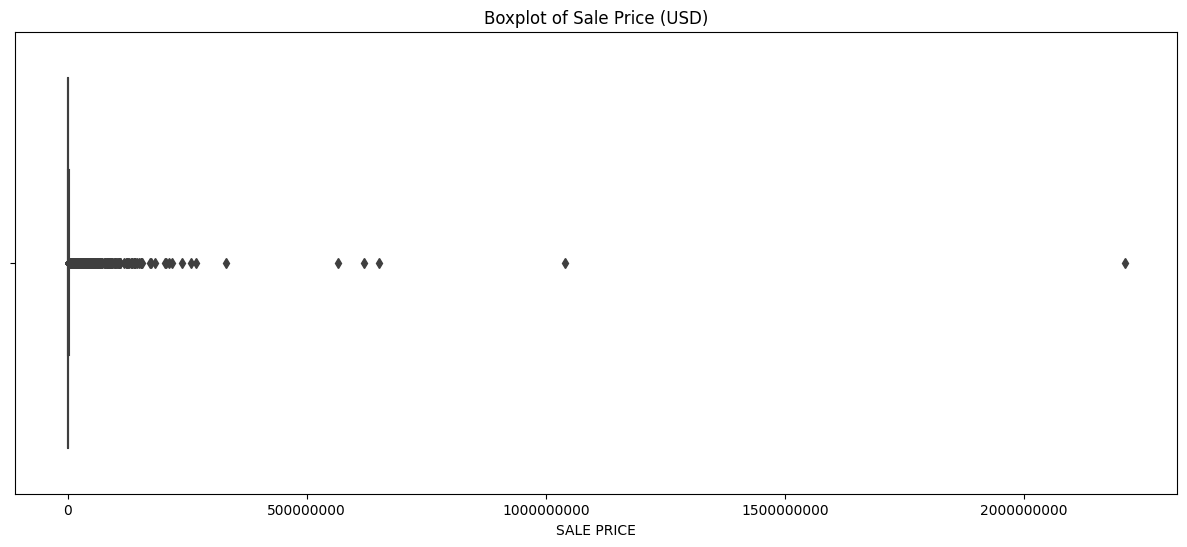

In [28]:
plt.figure(figsize=(15,6))


sns.boxplot(x='SALE PRICE', data=data_sale)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of Sale Price (USD)')
plt.show()

* Terlihat melalui hasil dari sebaran box plot bahwa data sale price di atas 50000000 terlihat memiliki outlier yang ekstrem. Sehingga diambil rentang harga dati 100000 hingga 50000000

In [29]:
# mengambil data pada sale price pada rentang  harga di bawah 50000000
data_sale = data_sale[(data_sale['SALE PRICE'] > 100000) & (data_sale['SALE PRICE'] < 50000000)]

### A. Mean
#### Berdasarkan dataset penjualan property di NYC. Kita akan melihat berapakah rata-rata di setiap wilayah yang terdapat pada dataset?
----

In [30]:
data_mean = data_sale.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.mean)
data_mean.sort_values('SALE PRICE',ascending=False, inplace=True)

data_mean

,SALE PRICE
BOROUGH,
Manhattan,3.646256e+06
Brooklyn,1.320326e+06
Bronx,8.991872e+05
Queens,8.387597e+05
Staten Islands,5.283618e+05


* Kesimpulan:
  Berdasarkan data di atas terlihat bahwa rata-rata dari setiap wilayah di NYC sebesar
  - Manhattan : $ 3.646.256
  
  - Brooklyn : $ 1.320.326
  
  - Bronx : $ 899.187

  - Queens : $ 838.759
  
  - Staten Islands : $ 528.361

### B. Median
#### Berapakah nilai tax class pada saat ini yang memiliki total units tertinggi dari data median?
#### Karena median menuju pada penilaian sesuatu dalam data yang menunjukkan tingkat kepuasan tertentu. Maka diambil data dari yang paling tinggi ke rendah.
-----

In [31]:
data_median = data_sale.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
data_median.sort_values('SALE PRICE',ascending=False, inplace=True)
data_median

,SALE PRICE
TAX CLASS AT PRESENT,
2B,2360000.0
4,1766454.5
2A,1221520.5
2,1110000.0
1C,970639.5
2C,870000.0
1B,650000.0
1,600000.0
1A,390000.0


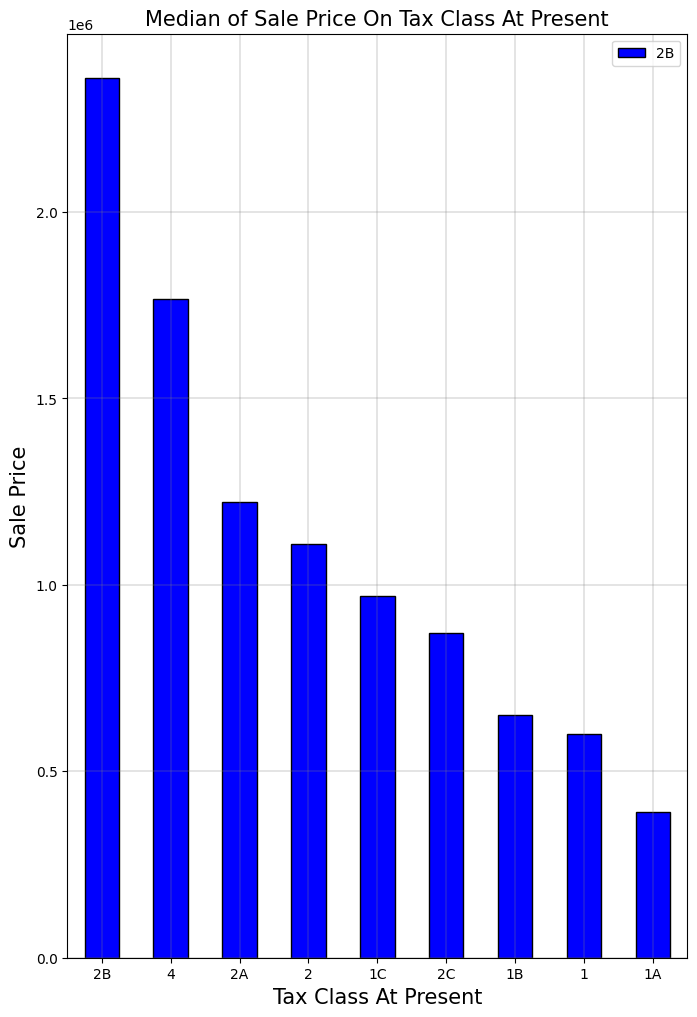

In [32]:
# membuat horizontal bar
data_median.plot(kind='bar', figsize=(8,12),legend = True, color='blue', edgecolor='black', rot=0)

plt.xlabel("Tax Class At Present", fontsize = 15)
plt.ylabel("Sale Price", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(labels=data_median.index, loc='upper right')
plt.grid(linewidth=0.3, color="grey")

# membuat dan mengatur ukuran judul
plt.title("Median of Sale Price On Tax Class At Present", fontsize = 15)
# menampilkan
plt.show()

* Kesimpulan:
  
  Berdasarkan data dia tas terlihat bahwa data median menunjukkan pada tax class at present ditunjukkan oleh kode 2B dengan sale price sebesar 2.360.000 dollar dan disusul oleh kode tax at present 4 sebesar 1.766.454. Hal ini menunjukkan bahwa pada kedua tax at present tersebut memiliki sale price paling umum dijual yang tinggi.

### C. Modus
#### Pada data modus digunakan untuk melihat data mana yang paling sering muncul. Oleh karena itu, alamat dan kategori gedung mana yang paling sering muncul?
-----

In [33]:
data_mode = data_sale.pivot_table(index='BOROUGH', values=['BUILDING CLASS CATEGORY','ADDRESS'], aggfunc=statistics.mode)
data_mode.sort_values('BUILDING CLASS CATEGORY',ascending=False, inplace=True)
data_mode.head()

,ADDRESS,BUILDING CLASS CATEGORY
BOROUGH,,
Manhattan,50 WEST STREET,13 CONDOS - ELEVATOR APARTMENTS
Bronx,2287 JOHNSON AVENUE,02 TWO FAMILY DWELLINGS
Brooklyn,429 KENT AVENUE,02 TWO FAMILY DWELLINGS
Queens,131-05 40TH ROAD,01 ONE FAMILY DWELLINGS
Staten Islands,145 LINCOLN AVENUE,01 ONE FAMILY DWELLINGS


* Kesimpulan:
  Pada data di atas terlihat bahwa alamat dan bulding class category pada masing-masing adalah:
  - Manhattan pada 50 WEST STREET kategori gedung 13 CONDOS - ELEVATOR APARTMENTS
  
  - Bronx pada 2287 JOHNSON AVENUE kategori gedung 02 TWO FAMILY DWELLINGS

  - Brooklyn pada 429 KENT AVENUE kategori gedung 02 TWO FAMILY DWELLINGS

  - Queens pada 131-05 40TH ROAD kategori gedung 01 ONE FAMILY DWELLINGS
  
  - Staten Islands pada 145 LINCOLN AVENUE kategori gedung 01 ONE FAMILY DWELLINGS

### D. Range
#### Berapa besar range dari land square feet dari wilayah Manhattan pada bangunan yang dibangun lebih darii tahun 2000?
---

In [34]:
# membutuhkan column baru untuk membuat sale of year dan sale of month dengan menduplikasi dataset
data_sale['SALE OF MONTH'] = pd.DatetimeIndex(data_sale['SALE DATE']).month
data_sale['SALE OF YEAR'] = pd.DatetimeIndex(data_sale['SALE DATE']).year

In [35]:
data_sale['YEAR BUILT'] = data_sale['YEAR BUILT'].astype('int64')
data_sale['SALE OF MONTH'] = data_sale['SALE OF MONTH'].astype('int64')
data_sale['SALE OF YEAR'] = data_sale['SALE OF YEAR'].astype('int64')

In [36]:
data_range1 = data_sale[(data_sale['BOROUGH'] == 'Manhattan') & (data_sale['YEAR BUILT'] > 2000)]['LAND SQUARE FEET']
data_range2 = data_sale[(data_sale['BOROUGH'] == 'Bronx') & (data_sale['YEAR BUILT'] > 2000)]['LAND SQUARE FEET']
data_range3 = data_sale[(data_sale['BOROUGH'] == 'Brooklyn') & (data_sale['YEAR BUILT'] > 2000)]['LAND SQUARE FEET']
data_range4 = data_sale[(data_sale['BOROUGH'] == 'Queens') & (data_sale['YEAR BUILT'] > 2000)]['LAND SQUARE FEET']
data_range5 = data_sale[(data_sale['BOROUGH'] == 'Staten Islands') & (data_sale['YEAR BUILT'] > 2000)]['LAND SQUARE FEET']

In [37]:
df_rangenew1 = np.ptp(data_range1)
df_rangenew2 = np.ptp(data_range2)
df_rangenew3 = np.ptp(data_range3)
df_rangenew4 = np.ptp(data_range4)
df_rangenew5 = np.ptp(data_range5)
print('Range dari Land Square Feet wilayah Manhattan pada bangunan yang dibangung lebih dari tahun 2000 adalah : ',df_rangenew1)
print('Range dari Land Square Feet wilayah Bronx pada bangunan yang dibangung lebih dari tahun 2000 adalah : ',df_rangenew2)
print('Range dari Land Square Feet wilayah Brooklyn pada bangunan yang dibangung lebih dari tahun 2000 adalah : ',df_rangenew3)
print('Range dari Land Square Feet wilayah Queens pada bangunan yang dibangung lebih dari tahun 2000 adalah : ',df_rangenew4)
print('Range dari Land Square Feet wilayah Staten Islands pada bangunan yang dibangung lebih dari tahun 2000 adalah : ',df_rangenew5)


Range dari Land Square Feet wilayah Manhattan pada bangunan yang dibangung lebih dari tahun 2000 adalah :  21771.0
Range dari Land Square Feet wilayah Bronx pada bangunan yang dibangung lebih dari tahun 2000 adalah :  22956.0
Range dari Land Square Feet wilayah Brooklyn pada bangunan yang dibangung lebih dari tahun 2000 adalah :  499600.0
Range dari Land Square Feet wilayah Queens pada bangunan yang dibangung lebih dari tahun 2000 adalah :  29168.0
Range dari Land Square Feet wilayah Staten Islands pada bangunan yang dibangung lebih dari tahun 2000 adalah :  207680.0


* Kesimpulan:
  Berdasarkan data di atas menunjukkan bahwa interval land square feet di wilayah Brooklyn pada bangunan property di atas tahun 2000 memiliki selisih terbesar yaitu  499.600 $m^{2}$.

### E. Varian
#### Berapakah variasi dari sale price, land square feet, gross square feet, residental units, dan commercial units di wilayah NYC?
------------------------------------

In [38]:
var1 = (data_sale['SALE PRICE']).var()
var2 = (data_sale['LAND SQUARE FEET']).var()
var3 = (data_sale['GROSS SQUARE FEET']).var()
var4 = (data_sale['RESIDENTIAL UNITS']).var()
var5 = (data_sale['COMMERCIAL UNITS']).var()
print("Variance of Sale Price : ",var1)
print("Variance of Land Square Feet : ",var2)
print("Variance of Gross Square Feet : ",var3)
print("Variance of Residential Units : ",var4)
print("Variance of Commercial Units : ",var5)


Variance of Sale Price :  7946201432064.691
Variance of Land Square Feet :  699928266.6524965
Variance of Gross Square Feet :  490988178.74775726
Variance of Residential Units :  191.62412285579467
Variance of Commercial Units :  6.664782443483562


* Kesimpulan:
  Data di atas menunjukkan bahwa dari variasi dengan memerhatikan variasi dari residental units dan commercial units memiliki variasi yang rendah.

### F. Standar Deviasi
#### Berapakah standar deviasi dari sale price, land square feet, gross square feet, residental units, dan commercial units di wilayah NYC?
-------------------------------------------------------------------

In [39]:
stdev1 = (data_sale['SALE PRICE']).std()
stdev2 = (data_sale['LAND SQUARE FEET']).std()
stdev3 = (data_sale['GROSS SQUARE FEET']).std()
stdev4 = (data_sale['RESIDENTIAL UNITS']).std()
stdev5 = (data_sale['COMMERCIAL UNITS']).std()
print("Standard Deviacy of Sale Price : ",stdev1)
print("Standard Deviacy of Land Square Feet : ",stdev2)
print("Standard Deviacy of Gross Square Feet : ",stdev3)
print("Standard Deviacy of Residental Units : ",stdev4)
print("Standard Deviacy of Commercial Units : ",stdev5)


Standard Deviacy of Sale Price :  2818900.748885049
Standard Deviacy of Land Square Feet :  26456.15744306978
Standard Deviacy of Gross Square Feet :  22158.253061732037
Standard Deviacy of Residental Units :  13.84283651770094
Standard Deviacy of Commercial Units :  2.58162399343583


* Kesimpulan:
  
  Pada standar deviasi terlihat bahwa residental dan commercial units memiliki nilai yang rendah, sehingga titik data cenderung mendekati rata-rata kumpulan data. Sedangkan untuk sale price memiliki nilai standardeviasi yang tinggi menunjukkan bahwa titik data tersebar di nilai yang lebih luas.

### G. Probability Distribution
----

In [40]:
# mengambil data pada sale of year tahun 2017 dnegan melihat bangunan yang dibangun lebih dari tahun 2000 dan kurang dari 2017
# mengambil sample harga kisaran 1000000 -10000000
df_pd = data_sale[
    (data_sale['SALE OF YEAR'] == 2017) & 
    (data_sale['YEAR BUILT'] > 2000) &
    (data_sale['YEAR BUILT'] < 2017) &
    (data_sale['SALE PRICE'] > 1000000) &
    (data_sale['SALE PRICE'] < 10000000)
]['SALE PRICE']

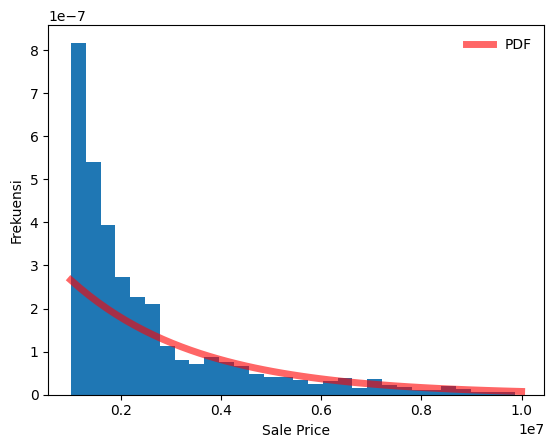

In [41]:
# membuat exponential distribution
from scipy.stats import expon

# menghitung rata-rata dan standar deviasi dari data
mu = np.mean(df_pd)
sigma = np.std(df_pd)

# membuat histogram dari data
plt.hist(df_pd, density=True, bins=30)

# membuat plot PDF distribusi eksponensial berdasarkan rata-rata data
x = np.linspace(1000000, 10000000, 50)
plt.plot(x, expon.pdf(x, scale=mu), 'r-', lw=5, alpha=0.6, label='PDF')

plt.xlabel('Sale Price')
plt.ylabel('Frekuensi')
plt.legend(loc='best', frameon=False)
plt.show()


* Kesimpulan:
  
  Berdasarkan exponential distribution diambil data yang menggambarkan waktu antara peristiwa yang terjadi pada tahun 2017 yang dilihat dari rentang waktu lebih dari year built pada tahun 2000 hingga kurang dari 2017, terlihat bahwa grafik menunjukkan peristiwa terjadi terus menerus dan independen pada tingkat rata-rata yang konstan. Semakin harganya murah, frekuensi akan semakin naik. Kemduian jika harga mahal, frekuensi akan menurun.

### H. Confidence Intervals
#### Berapakah tingkat kepercayaan harga jual property di wilayah Bronx? 
##### Hal ini berdasarkan modus yang banyak keluar sebelumnya
---

In [42]:
manhattan = (data_sale[data_sale['BOROUGH'] == 'Manhattan']['SALE PRICE'])
data1 = np.mean(manhattan)
data2 = np.std(manhattan)
data3 = np.size(manhattan)

In [43]:
print('Mean dari Sale price wilayah Manhattan: ',data1)
print('Standar deviasi dari Sale price wilayah Manhattan: ',data2)
print('Size dari Sale price wilayah Manhattan: ',data3)

Mean dari Sale price wilayah Manhattan:  3646255.5185563997
Standar deviasi dari Sale price wilayah Manhattan:  5117983.54216736
Size dari Sale price wilayah Manhattan:  6844


In [44]:
# menghitung interval kepercayaan
n = data3
stderr = data2 / np.sqrt(n)
z = 1.96
data_lower = data1 - z*stderr
data_upper = data1 + z*stderr

print("95% confidence interval:", (data_lower, data_upper))

95% confidence interval: (3525000.434806316, 3767510.6023064833)


* Kesimpulan:
  
  Berdasarkan data di atas terlihat bahwa kepercayaan terhadap harga dari wilayah Manhattan paling rendah sebesar 3.525.000 dollar dan tertinggi 3.767.510 dollar.

### I. Hypothesis Testing
----

#### Akan diuji apakah rata-rata dari wilayah Queens dan Staten Islands memiliki harga yang signifikan dari rata-rata penjualan properti?

##### Uji Coba:
- H0 = tidak perbedaan signifikan antara rata-rata harga penjualan properti di wilayah Brooklyn dan Staten Islands.
- H1 = terdapat perbedaan signifikan antara rata-rata harga penjualan properti di wilayah Brooklyn dan Staten Islands.

In [45]:
brooklyn = (data_sale[data_sale['BOROUGH'] == 'Brooklyn']['SALE PRICE'])
data1 = np.mean(brooklyn)
data2 = np.std(brooklyn)
data3 = np.size(brooklyn)


In [46]:
print('Mean dari Sale price wilayah Brooklyn: ',data1)
print('Standar deviasi dari Sale price wilayah Brooklyn: ',data2)
print('Size dari Sale price wilayah Brooklyn: ',data3)

Mean dari Sale price wilayah Brooklyn:  1320326.1567662272
Standar deviasi dari Sale price wilayah Brooklyn:  2155490.1276320983
Size dari Sale price wilayah Brooklyn:  11986


In [47]:
statenislands = (data_sale[data_sale['BOROUGH'] == 'Staten Islands']['SALE PRICE'])
data4 = np.mean(statenislands)
data5 = np.std(statenislands)
data6 = np.size(statenislands)

In [48]:
print('Mean dari Sale price wilayah Staten Islands: ',data4)
print('Standar deviasi dari Sale price wilayah Staten Islands: ',data5)
print('Size dari Sale price wilayah Staten Islands: ',data6)

Mean dari Sale price wilayah Staten Islands:  528361.8466302368
Standar deviasi dari Sale price wilayah Staten Islands:  457980.763227306
Size dari Sale price wilayah Staten Islands:  5490


In [49]:
import numpy as np
from scipy.stats import ttest_ind

# sample data yang dibutuhkan
brooklyn_sales = np.random.normal(loc=data1, scale=data2, size=data3)
statenisland_sales = np.random.normal(loc=data4, scale=data5, size=data6)

# menghitung t-test dan p-value
t_stat, p_value = ttest_ind(brooklyn_sales, statenisland_sales, equal_var=False)

# set significance level
alpha = 0.05

# intrepertasi hasil
if p_value < alpha:
    print("Hipotesis nol ditolak, terdapat perbedaan signifikan antara rata-rata harga penjualan properti di wilayah Brooklyn dan Staten Islands.")
else:
    print("Gagal menolak hipotesis nol, tidak ada cukup bukti untuk menyimpulkan bahwa ada perbedaan signifikan antara rata-rata harga penjualan properti di wilayah Brooklyn dan Staten Islands.")


Hipotesis nol ditolak, terdapat perbedaan signifikan antara rata-rata harga penjualan properti di wilayah Brooklyn dan Staten Islands.


### Overall Aanalysis
---

#### Berdasarkan data di atas beberapa kesimpulan yang dapat ditarik adalah:
- Rata-rata hara dari setiap wilayah di NYC yang memiliki harga jual yang tinggi adalah Manhattan sebesar $ 3.646.256

- Median dari tax class at present yaitu jenis property yang banyak di jual adalah kode 2B dengan harga yang paling umum di jual pada kode tersebut sebesar $ 2.360.000.
  
- Modus pada data yang diambil melalaui wilayah, adress, dan building class category menunjukkan bahwa pada wilayah Manhattan paling banyak mumcul pada alamat 50 WEST STREETdengan kategori rumah 13 condos - elevator apartements.
  
- Range terbesar dari tahun bangunan yang dibangun lebih dari tahun 2000, menunjukkan bahwa selisih terbesar land square feet ada di wilayah Brooklyn.
  
- Data varian pada column residential units dan commercial units adalah kategori rendah.
  
- Sebagai data yang rendah dari variasi, residential dan commercial units pada standar deviasi menunjukkan data cenderung mendekati rata-rata kumpulan data.
  
- Pada exponential ditribution terlihat bahwa pada bangunan yang lebih dari tahun 2000 dan kurang dari 2017 menunjukan konsistensi harga yang rendah akan membuat frekuensi naik, dan sebaliknya harga mahal membuat ferekensi menurun.
  
- Terlihat dari confidence interval bahwa pada wilayah Manhattan yang memiliki modus yang paing banyak muncul melalui harga yang dipercayai  paling rendah sebesar 3.525.000 dollar dan tertinggi 3.767.510 dollar.
  
- Pengujian hypothesis testing pada wilayah yang memiliki range land square feet yang luas yaitu Brooklyn dan Staten Island menunjukkan bahwa terdapat perbedaan signifikan antara rata-rata harga penjualan properti di wilayah Brooklyn dan Staten Islands pada kedua wilayah tersebut.